In [2]:
import pandas as pd
import numpy as np

# Load the training dataset
df = pd.read_csv('train.csv')

# Display the first 5 rows to confirm loading
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [3]:
# Display basic information
df.info()

# Display summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1196 non-null   object 
 8   peripheral_pulse       1175 non-null   object 
 9   mucous_membrane        1214 non-null   object 
 10  capillary_refill_time  1229 non-null   object 
 11  pain                   1191 non-null   object 
 12  peristalsis            1215 non-null   object 
 13  abdominal_distention   1212 non-null   object 
 14  nasogastric_tube       1155 non-null   object 
 15  naso

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [4]:
# Display the column titles
df.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

In [5]:
# Find out how many unique values each column contains
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

id: 1235 unique values
surgery: 2 unique values
age: 2 unique values
hospital_number: 255 unique values
rectal_temp: 43 unique values
pulse: 50 unique values
respiratory_rate: 37 unique values
temp_of_extremities: 4 unique values
peripheral_pulse: 4 unique values
mucous_membrane: 6 unique values
capillary_refill_time: 3 unique values
pain: 6 unique values
peristalsis: 5 unique values
abdominal_distention: 4 unique values
nasogastric_tube: 3 unique values
nasogastric_reflux: 4 unique values
nasogastric_reflux_ph: 26 unique values
rectal_exam_feces: 5 unique values
abdomen: 5 unique values
packed_cell_volume: 49 unique values
total_protein: 83 unique values
abdomo_appearance: 3 unique values
abdomo_protein: 54 unique values
surgical_lesion: 2 unique values
lesion_1: 57 unique values
lesion_2: 4 unique values
lesion_3: 2 unique values
cp_data: 2 unique values
outcome: 3 unique values


In [6]:
# Drop any columns that are not relevant
df = df.drop(['id', 'lesion_1', 'lesion_2', 'lesion_3', 'cp_data'], axis=1)

In [7]:
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1235 non-null   object 
 1   age                    1235 non-null   object 
 2   hospital_number        1235 non-null   int64  
 3   rectal_temp            1235 non-null   float64
 4   pulse                  1235 non-null   float64
 5   respiratory_rate       1235 non-null   float64
 6   temp_of_extremities    1196 non-null   object 
 7   peripheral_pulse       1175 non-null   object 
 8   mucous_membrane        1214 non-null   object 
 9   capillary_refill_time  1229 non-null   object 
 10  pain                   1191 non-null   object 
 11  peristalsis            1215 non-null   object 
 12  abdominal_distention   1212 non-null   object 
 13  nasogastric_tube       1155 non-null   object 
 14  nasogastric_reflux     1214 non-null   object

In [8]:
# Drop any rows with null values
df = df.dropna()

print("New data info:")
df.info()

New data info:
<class 'pandas.core.frame.DataFrame'>
Index: 771 entries, 0 to 1233
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                771 non-null    object 
 1   age                    771 non-null    object 
 2   hospital_number        771 non-null    int64  
 3   rectal_temp            771 non-null    float64
 4   pulse                  771 non-null    float64
 5   respiratory_rate       771 non-null    float64
 6   temp_of_extremities    771 non-null    object 
 7   peripheral_pulse       771 non-null    object 
 8   mucous_membrane        771 non-null    object 
 9   capillary_refill_time  771 non-null    object 
 10  pain                   771 non-null    object 
 11  peristalsis            771 non-null    object 
 12  abdominal_distention   771 non-null    object 
 13  nasogastric_tube       771 non-null    object 
 14  nasogastric_reflux     771 non-null    object 


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('outcome', axis=1)
y = df['outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)


X_train: (616, 23)
X_val: (155, 23)
y_train: (616,)
y_val: (155,)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 771 entries, 0 to 1233
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                771 non-null    object 
 1   age                    771 non-null    object 
 2   hospital_number        771 non-null    int64  
 3   rectal_temp            771 non-null    float64
 4   pulse                  771 non-null    float64
 5   respiratory_rate       771 non-null    float64
 6   temp_of_extremities    771 non-null    object 
 7   peripheral_pulse       771 non-null    object 
 8   mucous_membrane        771 non-null    object 
 9   capillary_refill_time  771 non-null    object 
 10  pain                   771 non-null    object 
 11  peristalsis            771 non-null    object 
 12  abdominal_distention   771 non-null    object 
 13  nasogastric_tube       771 non-null    object 
 14  nasogastric_reflux     771 non-null    object 
 15  nasogastri

In [9]:
# Fill missing values in categorical features with the mode (most frequent value)
categorical_columns = X_train.select_dtypes(include=['object']).columns

for column in categorical_columns:
    mode_value = X_train[column].mode()[0]
    X_train[column] = X_train[column].fillna(mode_value)
    X_val[column] = X_val[column].fillna(mode_value)

In [10]:
# Fill missing values in numerical features with the median value
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    median_value = X_train[column].median()
    X_train[column] = X_train[column].fillna(median_value)
    X_val[column] = X_val[column].fillna(median_value)

In [11]:
# Map 'euthanized' to 'died' in the 'outcome' column
y_train = y_train.replace({'euthanized': 'died'})
y_val = y_val.replace({'euthanized': 'died'})

# Now, the outcomes are only 'died' or 'lived'
print("Updated Classes in Training Set:")
print(y_train.unique())

print("Updated Classes in Validation Set:")
print(y_val.unique())

Updated Classes in Training Set:
['lived' 'died']
Updated Classes in Validation Set:
['lived' 'died']


In [12]:
X_train.isnull().sum()
# X_val.isnull().sum()
# y_train.isnull().sum()
# y_val.isnull().sum()


surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
dtype: int64

In [13]:
# One-Hot Encoding
categorical_columns = X_train.select_dtypes(include=['object']).columns

# One-hot encode the categorical columns in the training set
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns)

# One-hot encode the categorical columns in the validation set
X_val_encoded = pd.get_dummies(X_val, columns=categorical_columns)

# Ensure the columns in X_train_encoded and X_val_encoded match
X_train_encoded, X_val_encoded = X_train_encoded.align(X_val_encoded, join='left', axis=1, fill_value=0)

In [25]:
X_train_encoded.columns

Index(['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate',
       'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein',
       'abdomo_protein', 'surgery_no', 'surgery_yes', 'age_adult', 'age_young',
       'temp_of_extremities_cold', 'temp_of_extremities_cool',
       'temp_of_extremities_normal', 'temp_of_extremities_warm',
       'peripheral_pulse_absent', 'peripheral_pulse_increased',
       'peripheral_pulse_normal', 'peripheral_pulse_reduced',
       'mucous_membrane_bright_pink', 'mucous_membrane_bright_red',
       'mucous_membrane_dark_cyanotic', 'mucous_membrane_normal_pink',
       'mucous_membrane_pale_cyanotic', 'mucous_membrane_pale_pink',
       'capillary_refill_time_3', 'capillary_refill_time_less_3_sec',
       'capillary_refill_time_more_3_sec', 'pain_alert', 'pain_depressed',
       'pain_extreme_pain', 'pain_mild_pain', 'pain_severe_pain',
       'peristalsis_absent', 'peristalsis_hypermotile',
       'peristalsis_hypomotile', 'peristalsis_norm

In [15]:
# Encoding the Target Variable
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Fit and transform the training target variable
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the validation target variable
y_val_encoded = label_encoder.transform(y_val)

In [16]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
numerical_columns = X_train_encoded.select_dtypes(include=['float64', 'int64']).columns
X_train_encoded[numerical_columns] = scaler.fit_transform(X_train_encoded[numerical_columns])

# Transform the validation data
X_val_encoded[numerical_columns] = scaler.transform(X_val_encoded[numerical_columns])

In [17]:
# Training the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train_encoded, y_train_encoded)

# Predict on the validation set
y_pred = model.predict(X_val_encoded)

# Evaluate the model for accuracy
from sklearn.metrics import accuracy_score
print(f"Validation Accuracy: {accuracy_score(y_val_encoded, y_pred)}")

Validation Accuracy: 0.7935483870967742


In [18]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_val_encoded, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_val_encoded, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[65 15]
 [17 58]]
Classification Report:
              precision    recall  f1-score   support

        died       0.79      0.81      0.80        80
       lived       0.79      0.77      0.78        75

    accuracy                           0.79       155
   macro avg       0.79      0.79      0.79       155
weighted avg       0.79      0.79      0.79       155



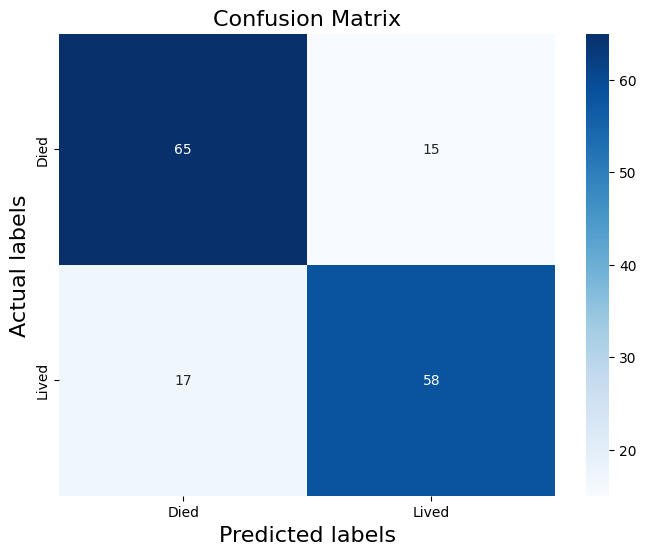

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Your confusion matrix values
conf_matrix = confusion_matrix(y_val_encoded, y_pred)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)

# Labels, title and ticks
label_font = {'size':'16'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font)
ax.set_ylabel('Actual labels', fontdict=label_font)
ax.set_title('Confusion Matrix', fontdict=label_font)
ax.xaxis.set_ticklabels(['Died', 'Lived'])
ax.yaxis.set_ticklabels(['Died', 'Lived'])

plt.show()

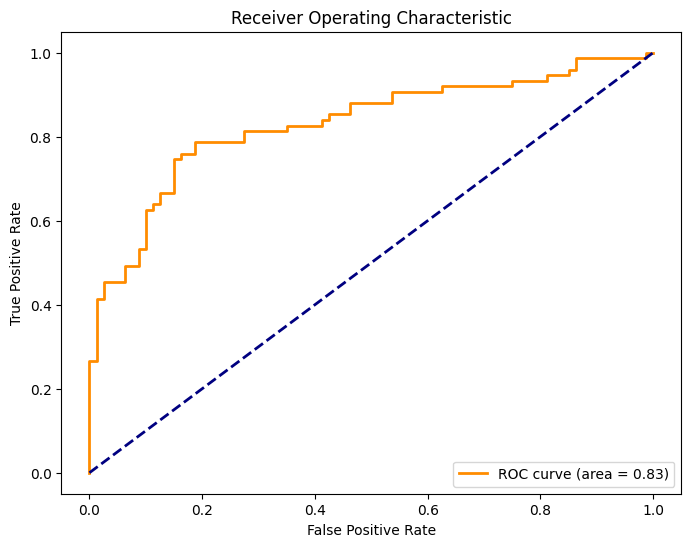

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_prob = model.predict_proba(X_val_encoded)[:, 1]  # Get probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val_encoded, y_prob)

# Calculate AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

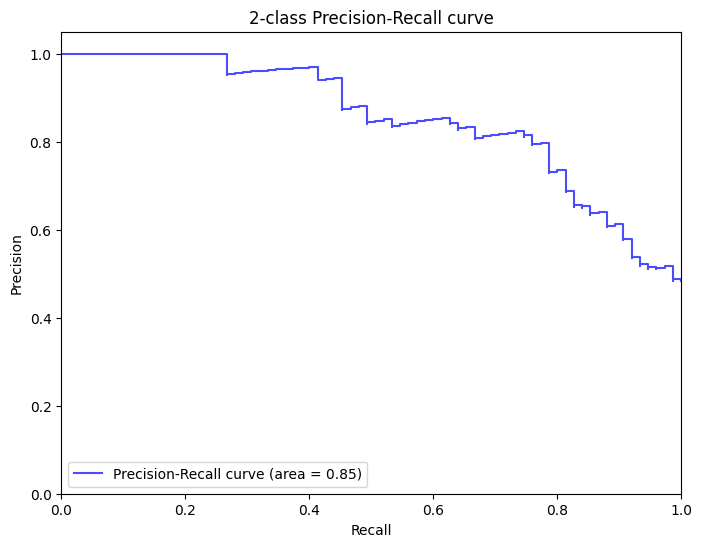

In [21]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_val_encoded, y_prob)

# Calculate average precision
average_precision = average_precision_score(y_val_encoded, y_prob)

# Plot
plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', color='b', alpha=0.7, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

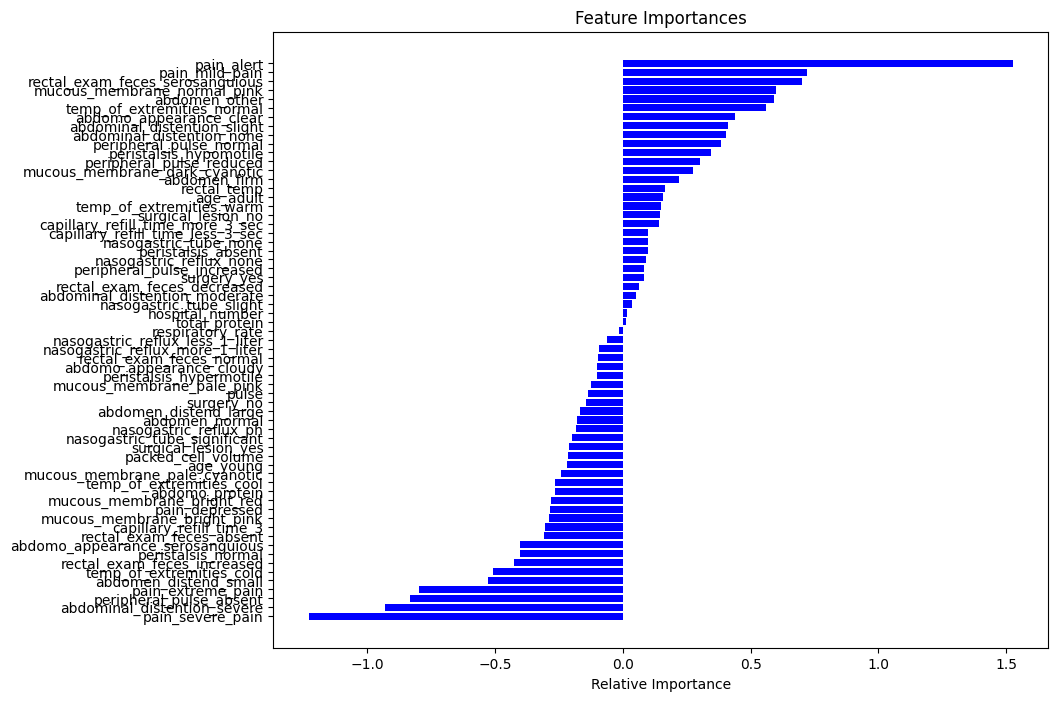

In [22]:
importance = model.coef_[0]
plt.figure(figsize=(10, 8))
indices = np.argsort(importance)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train_encoded.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

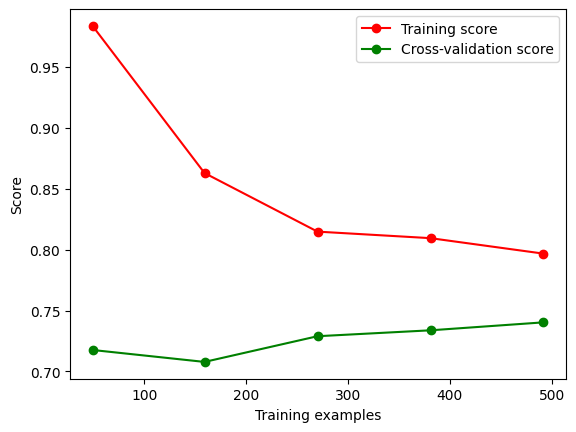

In [23]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train_encoded, y_train_encoded, train_sizes=np.linspace(.1, 1.0, 5), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

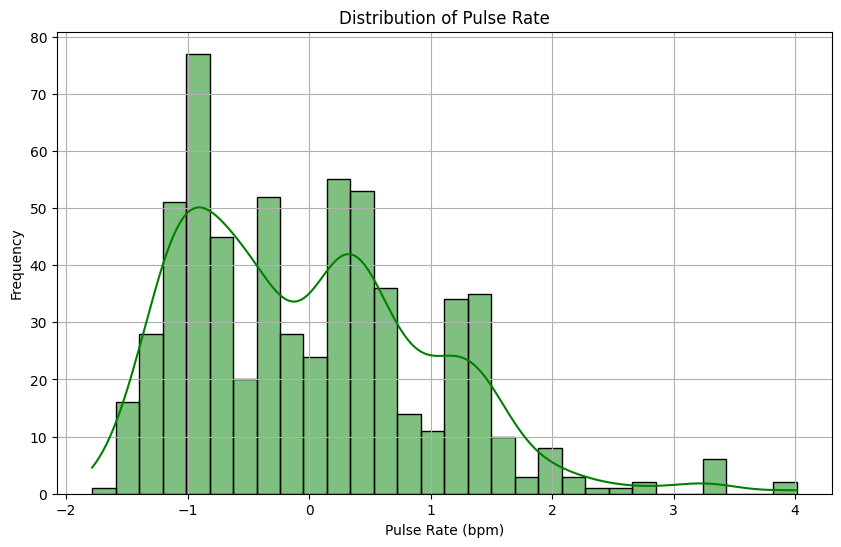

In [31]:
df_encoded = X_train_encoded 
# Create the histogram for 'pulse'
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['pulse'], bins=30, kde=True, color='green')

# Customize the plot
plt.title('Distribution of Pulse Rate')
plt.xlabel('Pulse Rate (bpm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

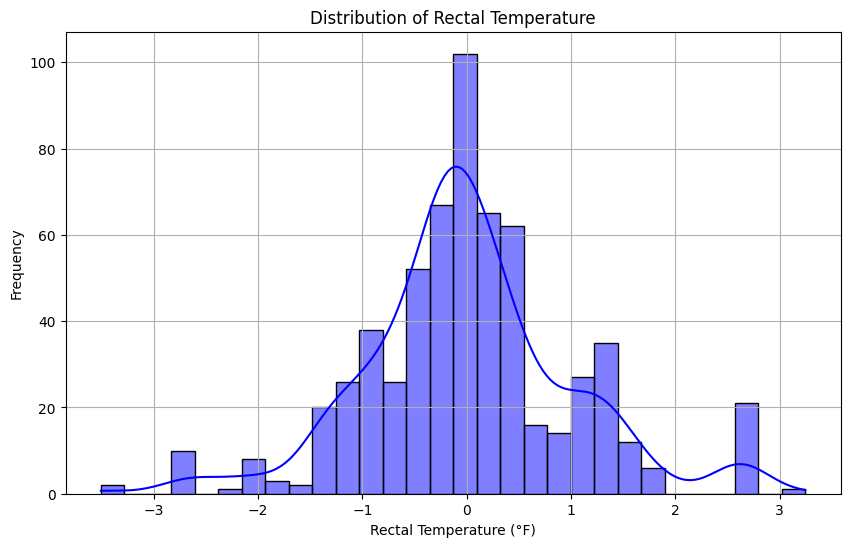

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_encoded = X_train_encoded

# Create the histogram for 'rectal_temp'
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['rectal_temp'], bins=30, kde=True, color='blue')

# Customize the plot
plt.title('Distribution of Rectal Temperature')
plt.xlabel('Rectal Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

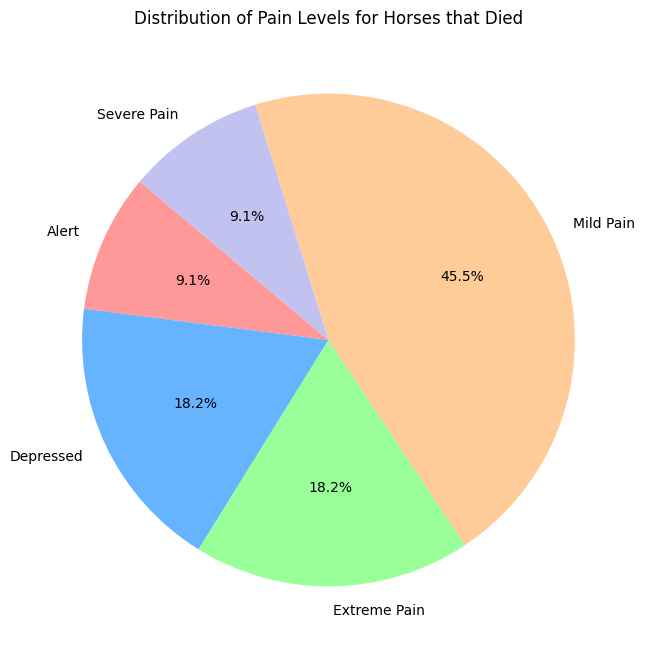

In [34]:
# Combine X_val_encoded and y_val_encoded into a single DataFrame
df_encoded = pd.concat([X_val_encoded, pd.Series(y_val_encoded, name='outcome')], axis=1)

# Filter the dataset to include only rows where the outcome is 'died'
lived_df = df_encoded[df_encoded['outcome'] == 1]

# List of pain level columns
pain_columns = ['pain_alert', 'pain_depressed', 'pain_extreme_pain', 'pain_mild_pain', 'pain_severe_pain']

# Sum the occurrences of each pain level in the filtered dataset
pain_counts = lived_df[pain_columns].sum()

# Mapping of original column names to display names
column_mapping = {
    'pain_alert': 'Alert',
    'pain_depressed': 'Depressed',
    'pain_extreme_pain': 'Extreme Pain',
    'pain_mild_pain': 'Mild Pain',
    'pain_severe_pain': 'Severe Pain'
}

# Apply the mapping to the index of pain_counts
pain_counts.index = pain_counts.index.map(column_mapping)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(pain_counts, labels=pain_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Distribution of Pain Levels for Horses that Died')
plt.show()